In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# წავიკითხოთ csv
file_path = 'Earthquakes_database.csv'
earthquakes_df = pd.read_csv(file_path)

# სვეტი "Date" გავყოთ "Year", "Month", და "Day" სვეტებად
earthquakes_df[['Month', 'Day', 'Year']] = earthquakes_df['Date'].str.split('/', expand=True)

# გარდავქმნათ სვეტი "Date" 
earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], format='mixed', utc=True)


threshold = len(earthquakes_df) * 0.5
cleaned_df = earthquakes_df.dropna(thresh=threshold, axis=1)


print(cleaned_df.head())
print(cleaned_df.info())

                       Date      Time  Latitude  Longitude        Type  Depth  \
0 1965-01-02 00:00:00+00:00  13:44:18    19.246    145.616  Earthquake  131.6   
1 1965-01-04 00:00:00+00:00  11:29:49     1.863    127.352  Earthquake   80.0   
2 1965-01-05 00:00:00+00:00  18:05:58   -20.579   -173.972  Earthquake   20.0   
3 1965-01-08 00:00:00+00:00  18:49:43   -59.076    -23.557  Earthquake   15.0   
4 1965-01-09 00:00:00+00:00  13:32:50    11.938    126.427  Earthquake   15.0   

   Magnitude Magnitude Type  Root Mean Square            ID  Source  \
0        6.0             MW               NaN  ISCGEM860706  ISCGEM   
1        5.8             MW               NaN  ISCGEM860737  ISCGEM   
2        6.2             MW               NaN  ISCGEM860762  ISCGEM   
3        5.8             MW               NaN  ISCGEM860856  ISCGEM   
4        5.8             MW               NaN  ISCGEM860890  ISCGEM   

  Location Source Magnitude Source     Status Month Day  Year  
0          ISCGEM     

In [34]:
earthquakes_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,12,28,2016
23408,2016-12-28 00:00:00+00:00,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,12,28,2016
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,4.8,1.5200,US10007NAF,US,US,US,Reviewed,12,28,2016
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,6.0,1.4300,US10007NL0,US,US,US,Reviewed,12,29,2016


In [35]:
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']

# "Magnitude" სვეტისთვის ვქმნით კატეგორიებს cut() ფუნქციის მეშვეობით
earthquakes_df['Magnitude_Category'] = pd.cut(earthquakes_df['Magnitude'], bins=bins, labels=labels, include_lowest=True)

print(earthquakes_df.head())

                       Date      Time  Latitude  Longitude        Type  Depth  \
0 1965-01-02 00:00:00+00:00  13:44:18    19.246    145.616  Earthquake  131.6   
1 1965-01-04 00:00:00+00:00  11:29:49     1.863    127.352  Earthquake   80.0   
2 1965-01-05 00:00:00+00:00  18:05:58   -20.579   -173.972  Earthquake   20.0   
3 1965-01-08 00:00:00+00:00  18:49:43   -59.076    -23.557  Earthquake   15.0   
4 1965-01-09 00:00:00+00:00  13:32:50    11.938    126.427  Earthquake   15.0   

   Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0          NaN                     NaN        6.0             MW  ...   
1          NaN                     NaN        5.8             MW  ...   
2          NaN                     NaN        6.2             MW  ...   
3          NaN                     NaN        5.8             MW  ...   
4          NaN                     NaN        5.8             MW  ...   

   Root Mean Square            ID  Source  Location Source  Magnitude Sour

In [36]:
earthquakes_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Magnitude_Category
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,Medium
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,Medium
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,High
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,Medium
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.1898,NN00570710,NN,NN,NN,Reviewed,12,28,2016,Medium
23408,2016-12-28 00:00:00+00:00,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.2187,NN00570744,NN,NN,NN,Reviewed,12,28,2016,Medium
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,1.5200,US10007NAF,US,US,US,Reviewed,12,28,2016,Medium
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,1.4300,US10007NL0,US,US,US,Reviewed,12,29,2016,High


In [50]:
# melt() ფუნქციით გარდავქმნათ დეითაფრეიმი
melted_df = pd.melt(earthquakes_df, id_vars=['Date'], value_vars=['Magnitude'], 
                    var_name='Measurement', value_name='Value')


print("Melted DataFrame:")
print(melted_df.head())

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Date']"

In [38]:
earthquakes_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Magnitude_Category
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,Medium
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,Medium
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,High
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,Medium
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.1898,NN00570710,NN,NN,NN,Reviewed,12,28,2016,Medium
23408,2016-12-28 00:00:00+00:00,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.2187,NN00570744,NN,NN,NN,Reviewed,12,28,2016,Medium
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,1.5200,US10007NAF,US,US,US,Reviewed,12,28,2016,Medium
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,1.4300,US10007NL0,US,US,US,Reviewed,12,29,2016,High


In [39]:
# pivot_table() ფუნქციით შევქმნათ summary თეიბლი გამოვთვალოთ საშუალო მაგნიტუდა წელიწადში
earthquakes_df['Year'] = pd.to_datetime(earthquakes_df['Date']).dt.year
pivot_table_df = earthquakes_df.pivot_table(values='Magnitude', index='Year', aggfunc='mean')


print("\nPivot Table:")
print(pivot_table_df.head())


Pivot Table:
      Magnitude
Year           
1965   6.014159
1966   6.040470
1967   6.003922
1968   6.078525
1969   6.009350


In [40]:
# 'Date' გადავიყვანოთ datetime ფორმატად 
earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], format='%m/%d/%Y')
earthquakes_df['Year'] = earthquakes_df['Date'].dt.year

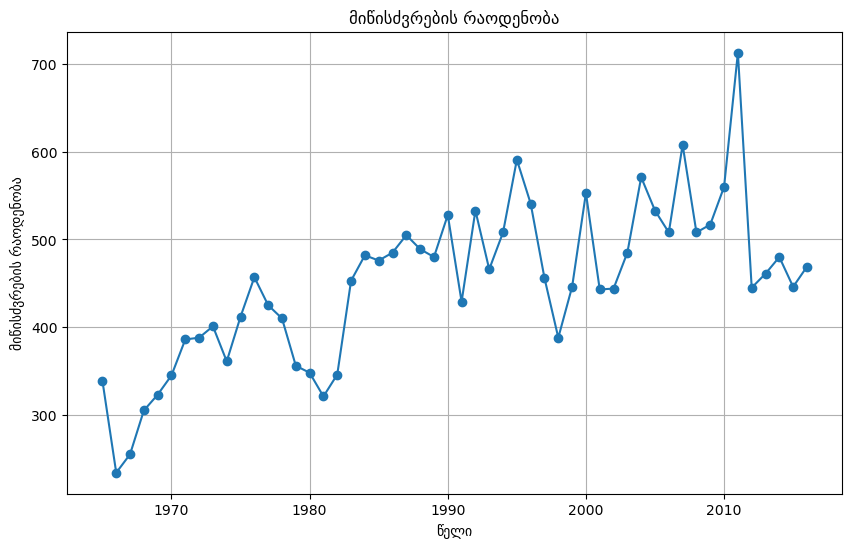

In [41]:
# ხაზოვანი დიაგრამა - მიწისძვრების რაოდენობა
plt.figure(figsize=(10, 6))
earthquakes_per_year = earthquakes_df['Year'].value_counts().sort_index()
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('მიწისძვრების რაოდენობა')
plt.xlabel('წელი')
plt.ylabel('მიწისძვრების რაოდენობა')
plt.grid(True)
plt.show()

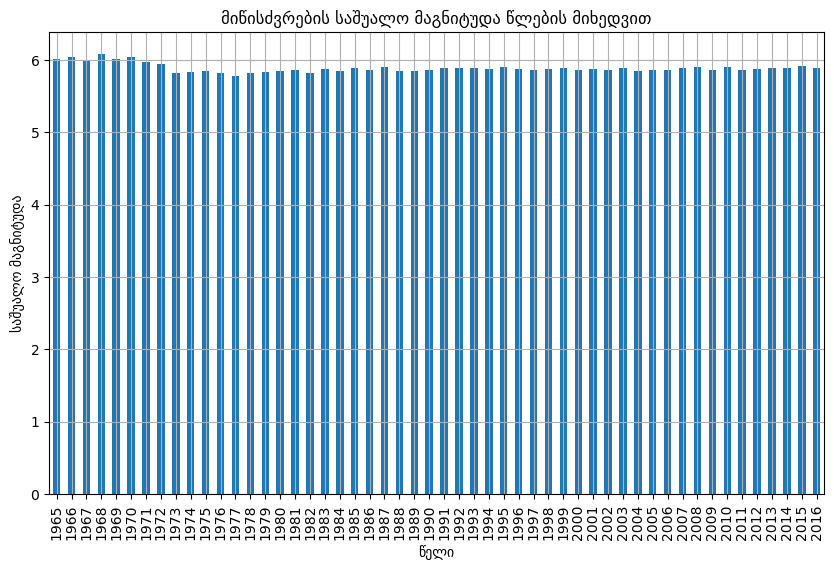

In [42]:
# სვეტოვანი დიაგრამა - მიწისძვრების საშუალო მაგნიტუდა წლების მიხედვით
plt.figure(figsize=(10, 6))
avg_magnitude_per_year = earthquakes_df.groupby('Year')['Magnitude'].mean()
avg_magnitude_per_year.plot(kind='bar')
plt.title('მიწისძვრების საშუალო მაგნიტუდა წლების მიხედვით')
plt.xlabel('წელი')
plt.ylabel('საშუალო მაგნიტუდა')
plt.grid(True)
plt.show()

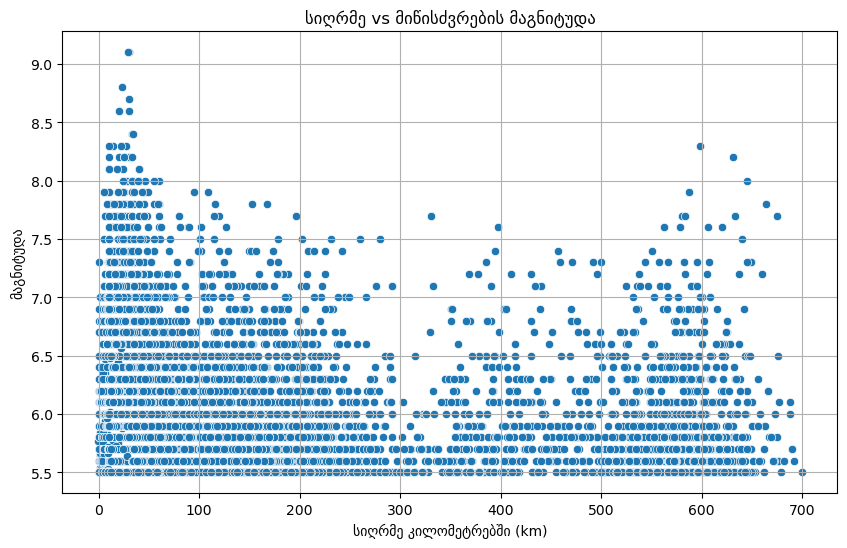

In [43]:
# გაფანტულობის დიაგრამა - სიღრმე vs მიწისძვრების მაგნიტუდა
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquakes_df, x='Depth', y='Magnitude')
plt.title('სიღრმე vs მიწისძვრების მაგნიტუდა')
plt.xlabel('სიღრმე (km)')
plt.ylabel('მაგნიტუდა')
plt.grid(True)
plt.show()

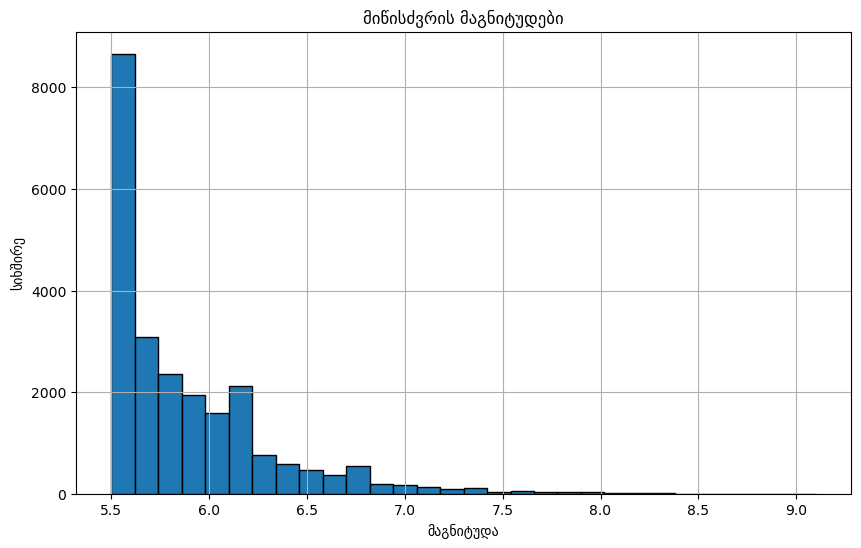

In [44]:
# ჰისტოგრამა - მიწისძვრის მაგნიტუდები
plt.figure(figsize=(10, 6))
plt.hist(earthquakes_df['Magnitude'], bins=30, edgecolor='black')
plt.title('მიწისძვრის მაგნიტუდები')
plt.xlabel('მაგნიტუდა')
plt.ylabel('სიხშირე')
plt.grid(True)
plt.show()

In [45]:
# ვანიჭებთ 'Date' სვეტს ინდექსად
earthquakes_df.set_index('Date', inplace=True)

In [46]:
# მიწისძვრების რაოდენობა თვეში
earthquakes_per_month = earthquakes_df['Magnitude'].resample('M').count()
print("Number of earthquakes per month:")
print(earthquakes_per_month.head())

Number of earthquakes per month:
Date
1965-01-31 00:00:00+00:00    13
1965-02-28 00:00:00+00:00    54
1965-03-31 00:00:00+00:00    38
1965-04-30 00:00:00+00:00    33
1965-05-31 00:00:00+00:00    22
Freq: M, Name: Magnitude, dtype: int64


In [47]:
# მიწისძვრების საშუალო მაგნიტუდების გამოთვლა წელიწადში
avg_magnitude_per_year = earthquakes_df['Magnitude'].resample('A').mean()
print("\nAverage magnitude of earthquakes per year:")
print(avg_magnitude_per_year.head())


Average magnitude of earthquakes per year:
Date
1965-12-31 00:00:00+00:00    6.014159
1966-12-31 00:00:00+00:00    6.040470
1967-12-31 00:00:00+00:00    6.003922
1968-12-31 00:00:00+00:00    6.078525
1969-12-31 00:00:00+00:00    6.009350
Freq: A-DEC, Name: Magnitude, dtype: float64


In [48]:
earthquakes_df

,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Magnitude_Category
Date,,,,,,,,,,,,,,,,,,,,,
1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,Medium
1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,Medium
1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,High
1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,Medium
1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28 00:00:00+00:00,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,...,0.1898,NN00570710,NN,NN,NN,Reviewed,12,28,2016,Medium
2016-12-28 00:00:00+00:00,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,...,0.2187,NN00570744,NN,NN,NN,Reviewed,12,28,2016,Medium
2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,...,1.5200,US10007NAF,US,US,US,Reviewed,12,28,2016,Medium
